In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Data Processing
import pandas as pd

#linear algebra
import numpy as np

#dat visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

#algorithms
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

#from xgboost import XGBRegressor 
from sklearn import metrics

In [3]:
df= pd.read_csv('database_IND.csv')

In [4]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
#statistical information
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [6]:
#check unique values in dataset

df.apply(lambda x: len(x.unique()))

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   4
other_fuel2                   2
other_fuel3                   1
commissioning_year           74
owner                       281
source                      191
url                         304
geolocation_source            4
wepp_id                       1
year_of_capacity_data         2
generation_gwh_2013           1
generation_gwh_2014         372
generation_gwh_2015         397
generation_gwh_2016         404
generation_gwh_2017         409
generation_gwh_2018         411
generation_gwh_2019           1
generation_data_source        2
estimated_generation_gwh      1
dtype: int64

# Preprocessing the dataset

In [7]:
#checking for the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
#check for categorical attribute

cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] =='object':
        cat_col.append(x)
cat_col

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [9]:
#print the categorical columns

for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

country
IND    907
Name: country, dtype: int64

country_long
India    907
Name: country_long, dtype: int64

name
MUKERIAN I -IV               1
MUNOLI DISTILLERY            1
GANGUWAL                     1
BAGALKOT ICP                 1
Kamuthi Solar Power Plant    1
                            ..
Gujurat Solar On             1
BHAWANI KATTALAI BARRAGE     1
SIKKA REP.                   1
Nargund Wind Farm            1
KOVILKALAPPAL                1
Name: name, Length: 907, dtype: int64

gppd_idnr
WRI1026753    1
WRI1019970    1
IND0000129    1
IND0000221    1
WRI1026221    1
             ..
IND0000193    1
WRI1019986    1
IND0000368    1
IND0000535    1
WRI1026657    1
Name: gppd_idnr, Length: 907, dtype: int64

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

other_fuel1
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

other

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [16]:
#replacing the missing values  columns with mean value

df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)
df['other_fuel3'].fillna(df['other_fuel3'].mean(), inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].mean(), inplace=True)
df['wepp_id'].fillna(df['wepp_id'].mean(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean(), inplace=True)
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)
df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].mean(), inplace=True)
df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean(), inplace=True)

In [17]:
#replacing the missing value column with mode value

df['other_fuel1'].fillna(df["other_fuel1"].mode()[0],inplace=True)
df['other_fuel2'].fillna(df["other_fuel2"].mode()[0],inplace=True)
df['owner'].fillna(df["owner"].mode()[0],inplace=True)
df['geolocation_source'].fillna(df["geolocation_source"].mode()[0],inplace=True)
df['generation_data_source'].fillna(df["generation_data_source"].mode()[0],inplace=True)

In [18]:
#checking for the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [21]:
df = df.drop(columns='other_fuel3', axis =1)
df = df.drop(columns='wepp_id', axis =1)
df = df.drop(columns='generation_gwh_2013', axis =1)
df = df.drop(columns='generation_gwh_2019', axis =1)
df = df.drop(columns='estimated_generation_gwh', axis =1)

In [22]:
#checking for the null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

# Data Analysis

In [23]:
#getting some statistical measures about the data

df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,13.016360,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1997.091082,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [24]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [25]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

# Data Visualisation

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

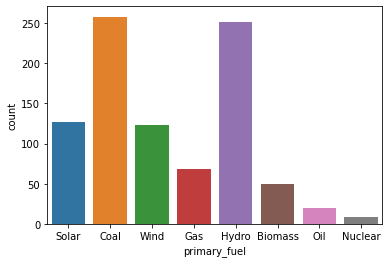

In [26]:
#making the count plot for "primary_fuel "column

sns.countplot('primary_fuel', data=df)

<AxesSubplot:xlabel='country', ylabel='count'>

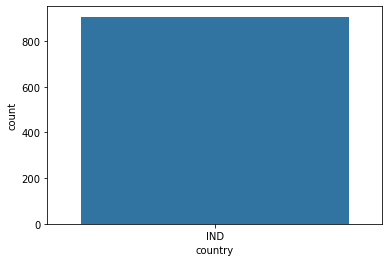

In [27]:
sns.countplot('country', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

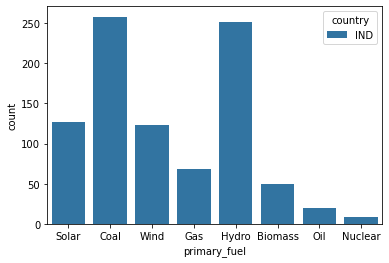

In [28]:

sns.countplot('primary_fuel', hue='country', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

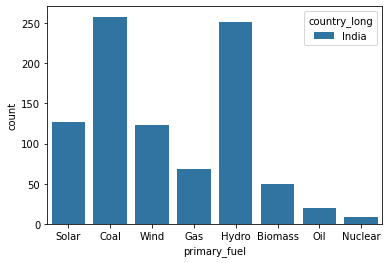

In [29]:
sns.countplot('primary_fuel', hue='country_long', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

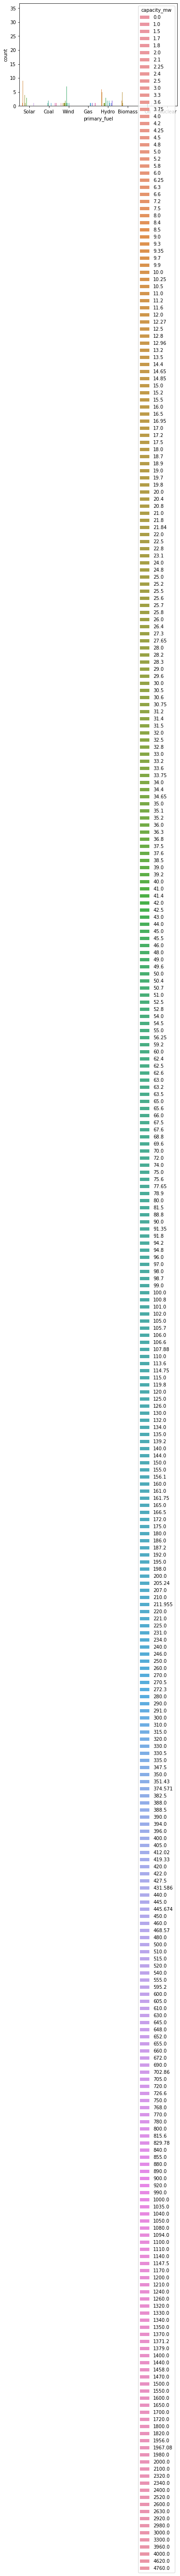

In [32]:
sns.countplot('primary_fuel', hue='capacity_mw', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

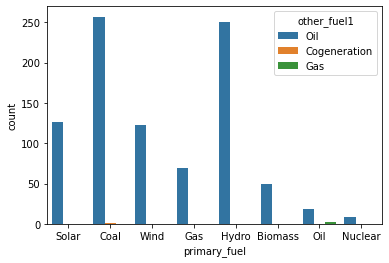

In [33]:
sns.countplot('primary_fuel', hue='other_fuel1', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

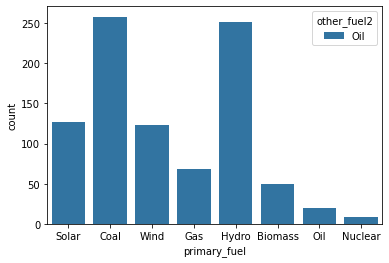

In [34]:
sns.countplot('primary_fuel', hue='other_fuel2', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

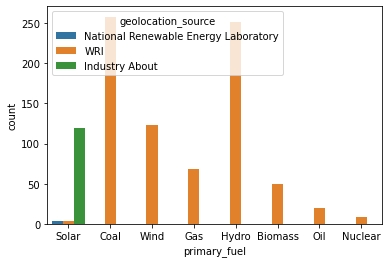

In [37]:
sns.countplot('primary_fuel', hue='geolocation_source', data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

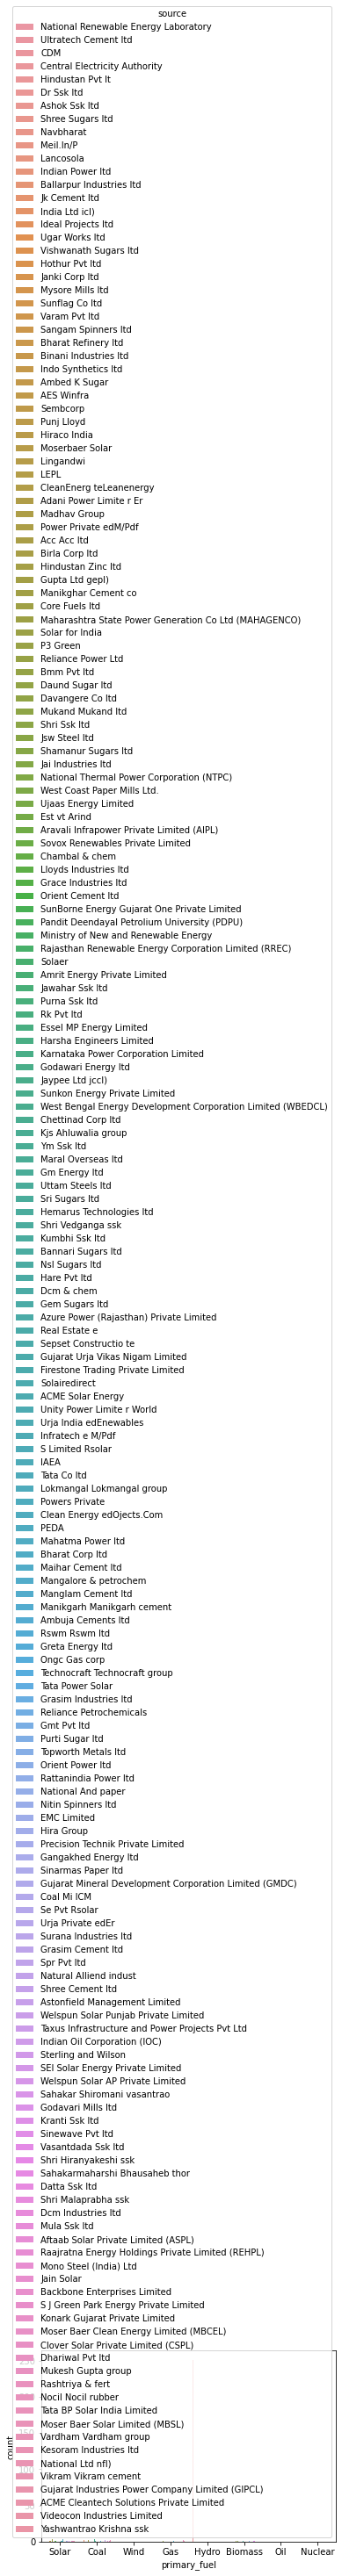

In [40]:
sns.countplot('primary_fuel', hue='source', data=df)

In [42]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,Oil,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Oil,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,Oil,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Oil,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Oil,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# separating the features and target for Primary_fuel

In [52]:
X = df.drop(columns=['generation_data_source','geolocation_source','url','source','other_fuel2','other_fuel1','primary_fuel','gppd_idnr','name','country_long','country','owner'], axis=1)
Y = df['primary_fuel']

In [53]:
print(X)

     capacity_mw  latitude  longitude  commissioning_year  \
0            2.5   28.1839    73.2407         2011.000000   
1           98.0   24.7663    74.6090         1997.091082   
2           39.2   21.9038    69.3732         1997.091082   
3          135.0   23.8712    91.3602         2004.000000   
4         1800.0   21.9603    82.4091         2015.000000   
..           ...       ...        ...                 ...   
902       1600.0   16.2949    77.3568         2016.000000   
903          3.0   12.8932    78.1654         1997.091082   
904         25.5   15.2758    75.5811         1997.091082   
905         80.0   24.3500    73.7477         1997.091082   
906         16.5    9.9344    77.4768         1997.091082   

     year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                   2019.0          2431.823590          2428.226946   
1                   2019.0          2431.823590          2428.226946   
2                   2019.0          2431.823590    

In [54]:
print(Y)

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 907, dtype: object


# Splitting the data into training data and testing data

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(907, 10) (725, 10) (182, 10)


# Model training

# Logistics Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [59]:
#traing the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [60]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [61]:
print(X_train_prediction)

['Coal' 'Solar' 'Solar' 'Solar' 'Solar' 'Solar' 'Coal' 'Hydro' 'Solar'
 'Wind' 'Solar' 'Coal' 'Hydro' 'Coal' 'Wind' 'Wind' 'Hydro' 'Hydro'
 'Solar' 'Solar' 'Solar' 'Solar' 'Coal' 'Solar' 'Hydro' 'Solar' 'Hydro'
 'Wind' 'Hydro' 'Hydro' 'Hydro' 'Solar' 'Hydro' 'Solar' 'Wind' 'Solar'
 'Solar' 'Solar' 'Solar' 'Hydro' 'Solar' 'Coal' 'Hydro' 'Solar' 'Solar'
 'Wind' 'Solar' 'Hydro' 'Solar' 'Hydro' 'Hydro' 'Hydro' 'Hydro' 'Hydro'
 'Solar' 'Hydro' 'Wind' 'Coal' 'Hydro' 'Solar' 'Solar' 'Hydro' 'Hydro'
 'Coal' 'Solar' 'Hydro' 'Hydro' 'Coal' 'Solar' 'Hydro' 'Solar' 'Wind'
 'Hydro' 'Coal' 'Solar' 'Hydro' 'Wind' 'Coal' 'Hydro' 'Coal' 'Coal' 'Coal'
 'Solar' 'Solar' 'Hydro' 'Solar' 'Hydro' 'Wind' 'Coal' 'Wind' 'Coal'
 'Coal' 'Coal' 'Hydro' 'Solar' 'Solar' 'Solar' 'Coal' 'Solar' 'Hydro'
 'Solar' 'Coal' 'Hydro' 'Hydro' 'Solar' 'Solar' 'Hydro' 'Hydro' 'Hydro'
 'Solar' 'Solar' 'Solar' 'Solar' 'Oil' 'Solar' 'Solar' 'Hydro' 'Hydro'
 'Solar' 'Coal' 'Hydro' 'Solar' 'Hydro' 'Solar' 'Coal' 'Solar' 'Coal'
 'Wind

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
training_data_accuracy =accuracy_score(Y_train, X_train_prediction)

In [64]:
print('Accuracy score of the training data',training_data_accuracy)

Accuracy score of the training data 0.49517241379310345


In [65]:
#accuracy on test data
X_test_prediction = model.predict(X_test)

In [66]:
print(X_test_prediction)

['Coal' 'Hydro' 'Solar' 'Hydro' 'Coal' 'Solar' 'Solar' 'Coal' 'Coal'
 'Hydro' 'Wind' 'Solar' 'Hydro' 'Hydro' 'Coal' 'Coal' 'Solar' 'Hydro'
 'Hydro' 'Solar' 'Solar' 'Hydro' 'Coal' 'Hydro' 'Coal' 'Hydro' 'Hydro'
 'Hydro' 'Hydro' 'Solar' 'Hydro' 'Hydro' 'Coal' 'Coal' 'Hydro' 'Coal'
 'Coal' 'Solar' 'Wind' 'Wind' 'Wind' 'Solar' 'Hydro' 'Solar' 'Hydro'
 'Solar' 'Wind' 'Hydro' 'Hydro' 'Solar' 'Hydro' 'Solar' 'Wind' 'Solar'
 'Hydro' 'Coal' 'Solar' 'Solar' 'Coal' 'Hydro' 'Coal' 'Solar' 'Coal'
 'Hydro' 'Hydro' 'Coal' 'Solar' 'Solar' 'Solar' 'Wind' 'Hydro' 'Hydro'
 'Coal' 'Hydro' 'Solar' 'Solar' 'Solar' 'Hydro' 'Solar' 'Solar' 'Solar'
 'Coal' 'Solar' 'Solar' 'Solar' 'Hydro' 'Coal' 'Hydro' 'Solar' 'Wind'
 'Hydro' 'Solar' 'Solar' 'Solar' 'Solar' 'Hydro' 'Coal' 'Coal' 'Hydro'
 'Hydro' 'Coal' 'Coal' 'Solar' 'Coal' 'Solar' 'Hydro' 'Hydro' 'Hydro'
 'Solar' 'Coal' 'Coal' 'Hydro' 'Coal' 'Solar' 'Hydro' 'Hydro' 'Solar'
 'Solar' 'Hydro' 'Coal' 'Wind' 'Solar' 'Wind' 'Hydro' 'Solar' 'Coal'
 'Solar' 'Wind' 'H

In [67]:
test_data_accuracy =accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the training data',test_data_accuracy)

Accuracy score of the training data 0.47802197802197804


# Stochastic Gradient Descent(SGD)

In [71]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
sgd = linear_model.SGDClassifier(max_iter=5,tol =None)
sgd.fit(X_train, Y_train)
Y_pred =sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd =round(sgd.score(X_train,Y_train) *100, 2)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_predition =random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest =round(random_forest.score(X_train, Y_train) *100, 2)

# K Nearest Neighbor

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)
acc_knn =round(knn.score(X_train, Y_train) *100 , 2)

# Gaussian Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)

# Perceptron

In [76]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)

# Linear Support Vector Machine

In [77]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)

# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)

# Which is the best model?

In [79]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, test_data_accuracy, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.000000,Random Forest
100.000000,Decision Tree
79.450000,KNN
48.690000,Naive Bayes
33.520000,Support Vector Machines
31.310000,Perceptron
30.210000,Stochastic Gradient Decent
0.478022,Logistic Regression


from the above we can conclude that Random Forest and Decision tree models are the most accurate